In [1]:
import numpy as np
import pandas as pd

# cnt1 값의 범위: 사과: 10대, 귤: 20대, 배: 단단위, 딸기 30이상
data = dict(fruits=['사과', '사과','사과', '사과','사과','귤','귤','귤','귤','귤','배','배','배','배','배','딸기','딸기','딸기','딸기','딸기']
            ,cnt1=[10, 12, 13, 11, 12, 21, 22, 27, 24, 26, 7, 7, 8, 3, 2, 30, 35, 37, 41, 28]
            ,cnt2=[100,  103, 107, 107,  101,  51,  57, 58,  57, 51,  9, 9,  5,  7,  7,  208, 217, 213, 206, 204]
           )
df = pd.DataFrame(data)
df

,fruits,cnt1,cnt2
0,사과,10,100
1,사과,12,103
2,사과,13,107
3,사과,11,107
4,사과,12,101
5,귤,21,51
6,귤,22,57
7,귤,27,58
8,귤,24,57
9,귤,26,51


In [7]:
# cnt1의 평균이 20이상인 과일의 인덱스만 추출
result = df.groupby('fruits')['cnt1'].mean()
result2 = result[result >= 20]
result2.index

Index(['귤', '딸기'], dtype='object', name='fruits')

In [6]:
# cnt1 컬럼의 평균의 20 이상인 과일들의 데이터만 추출
df[df['fruits'].isin(result2.index)]

,fruits,cnt1,cnt2
5,귤,21,51
6,귤,22,57
7,귤,27,58
8,귤,24,57
9,귤,26,51
15,딸기,30,208
16,딸기,35,217
17,딸기,37,213
18,딸기,41,206
19,딸기,28,204


# filter()
- `DataFrameGroupBy.filter(func, dropna=True, *args, **kwargs)`
- 특정 **조건을 만족하는 Group의 데이터(행)들을 조회**할 때 사용한다. 주로 조건은 group별 집계결과를 이용한다.
    1. 함수에 group별 DataFrame을 argument로 전달한다.
    2. 함수는 받은 DataFrame을 이용해 집계한 값의 조건을 비교해서 반환한다.(반환타입: Bool) 
    3. 반환값이 True인 Group들의 모든 행들로 구성된 DataFrame을 반환한다.
- 매개변수
    - **func**: filtering 조건을 구현한 함수 객체
        - 첫번째 매개변수로 Group으로 묶인 DataFrame을 받는다.
        - bool type 값을 반환한다. 매개변수로 받은 DataFrame이 특정 조건을 만족하는지 여부를 반환한다.
    - **dropna=True**
        - 필터를 통과하지 못한 group의 DataFrame의 값들을 drop시킨다(기본값). False로 설정하면 NA 처리해서 반환한다.
    - **\*args, \*\*kwargs**: filter 함수의 두번째부터  선언된 매개변수에 전달할 argument 값들을 가변인자로 전달한다.

In [16]:
# groupby의 filter 메소드 -> dataframe의 filter 메소드와는 다름
r = df.groupby('fruits')
type(r)

pandas.core.groupby.generic.DataFrameGroupBy

In [22]:
# cnt1의 평균이 20이상인 과일의 인덱스만 추출할 커스텀 함수
# filter() 메소드는 커스텀 함수의 리턴값이 True인 데이터만 추출
# filter에 전달될 함수는 데이터프레임을 인자로 받고, True/False를 리턴하는 함수여야 함
def check_mean_over_20(df : pd.DataFrame):
    return df['cnt1'].mean() >= 20

In [23]:
df.groupby('fruits').groups

{'귤': [5, 6, 7, 8, 9], '딸기': [15, 16, 17, 18, 19], '배': [10, 11, 12, 13, 14], '사과': [0, 1, 2, 3, 4]}

In [30]:
# filter 메소드는 커스텀 함수의 리턴값이 True인 데이터만 추출
df.groupby('fruits').filter(check_mean_over_20)

,fruits,cnt1,cnt2
5,귤,21,51
6,귤,22,57
7,귤,27,58
8,귤,24,57
9,귤,26,51
15,딸기,30,208
16,딸기,35,217
17,딸기,37,213
18,딸기,41,206
19,딸기,28,204


In [29]:
# dropna=False 옵션을 주면, 커스텀 함수의 리턴값이 False인 데이터도 추출
# 커스텀 함수의 리턴값이 False인 데이터는 NaN으로 채워짐
df.groupby('fruits').filter(check_mean_over_20, dropna=False)

,fruits,cnt1,cnt2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,귤,21.0,51.0
6,귤,22.0,57.0
7,귤,27.0,58.0
8,귤,24.0,57.0
9,귤,26.0,51.0


In [32]:
# cnt1의 평균이 20이상인 과일의 인덱스만 추출할 커스텀 함수
# filter() 메소드는 커스텀 함수의 리턴값이 True인 데이터만 추출
# filter에 전달될 함수는 데이터프레임을 인자로 받고, True/False를 리턴하는 함수여야 함
# 다른 인자를 추가해서 커스텀 함수를 정의할 수 있음
def check_mean_over_n(df : pd.DataFrame, thresh_h = 20):
    return df['cnt1'].mean() >= thresh_h

In [33]:
# thresh_h 인자를 추가해서 커스텀 함수를 정의할 수 있음
# 인자를 건네어줄땐 filter 메소드의 args 인자에 리스트로 전달
df.groupby('fruits').filter(check_mean_over_n, thresh_h=30)

,fruits,cnt1,cnt2
15,딸기,30,208
16,딸기,35,217
17,딸기,37,213
18,딸기,41,206
19,딸기,28,204


In [26]:
# filter 메소드는 커스텀 함수의 리턴값이 True인 데이터만 추출
# 람다식으로 표현도 가능
df.groupby('fruits').filter(lambda dF_ : dF_['cnt1'].mean() >= 20)

,fruits,cnt1,cnt2
5,귤,21,51
6,귤,22,57
7,귤,27,58
8,귤,24,57
9,귤,26,51
15,딸기,30,208
16,딸기,35,217
17,딸기,37,213
18,딸기,41,206
19,딸기,28,204


# transform
- `DataFrameGroupBy.transform(func, *args)`, `SeriesGroupBy.transform(func, *args)`
    - 함수(func)에 열(컬럼)의 값들을 group 별로 전달 한다. 함수는 그 값을 받아 통계량을 구해 반환한다. 반환된 통계량으로 원래 값들을 변경한 Series를 반환한다. 여러 컬럼에 대해 처리할 경우 DataFrame을 반환한다.
    - func: 함수객체
        - 매개변수
            - 그룹별 컬럼값들을 받을 변수 선언
        - return
            - 계산한 통계량.
        - DataFrameGroupBy은 모든 컬럼의 값들을 group 별 Series로 전달한다.
    - *args: 함수에 전달할 추가 인자값이 있으면 매개변수 순서에 맞게 값을 전달한다.
- transform() 함수를 groupby() 와 사용하면 컬럼의 각 원소들을 자신이 속한 그룹의 통계량으로 변환된 데이터셋을 생성할 수 있다.
- 컬럼의 값과 통계값을 비교해서 보거나 결측치 처리등에 사용할 수있다.

## 원본에 통계치 붙여서 비교하기

In [48]:
df_ = df.copy()

In [40]:
df_.groupby('fruits')['cnt1'].mean()

fruits
귤     24.0
딸기    34.2
배      5.4
사과    11.6
Name: cnt1, dtype: float64

In [42]:
# SeriesGroupBy 타입
type(df_.groupby('fruits')['cnt1'])

pandas.core.groupby.generic.SeriesGroupBy

In [44]:
# SeriesGroupBy 타입에 transform 메소드를 적용하면, Series 타입이 리턴됨
# transform 메소드는 agg처럼 dataframe의 메소드는 문자열로 전달할 수 있음
# transform 메소드는 연산결과를 데이터프레임의 인덱스 순서대로 리턴
r = df_.groupby('fruits')['cnt1'].transform('mean')
r

0     11.6
1     11.6
2     11.6
3     11.6
4     11.6
5     24.0
6     24.0
7     24.0
8     24.0
9     24.0
10     5.4
11     5.4
12     5.4
13     5.4
14     5.4
15    34.2
16    34.2
17    34.2
18    34.2
19    34.2
Name: cnt1, dtype: float64

In [45]:
# 데이터프레임에 transform으로 만든 Series를 추가
df_.insert(2, 'cnt1_mean', r)

In [46]:
df_

,fruits,cnt1,cnt1_mean,cnt2
0,사과,10,11.6,100
1,사과,12,11.6,103
2,사과,13,11.6,107
3,사과,11,11.6,107
4,사과,12,11.6,101
5,귤,21,24.0,51
6,귤,22,24.0,57
7,귤,27,24.0,58
8,귤,24,24.0,57
9,귤,26,24.0,51


In [49]:
df_.groupby('fruits').transform('mean')

,cnt1,cnt2
0,11.6,103.6
1,11.6,103.6
2,11.6,103.6
3,11.6,103.6
4,11.6,103.6
5,24.0,54.8
6,24.0,54.8
7,24.0,54.8
8,24.0,54.8
9,24.0,54.8


In [74]:
# df2에 cnt1의 평균을 구해서 cnt1_mean 컬럼에 추가
# df2에 cnt2의 평균을 구해서 cnt2_mean 컬럼에 추가
df2 = pd.DataFrame(data)
result = df2.groupby('fruits')['cnt1'].transform('mean')
df2.insert(2, 'cnt1_mean2', result)
df2['cnt2_mean'] = df_.groupby('fruits')['cnt2'].transform('mean')
df2

,fruits,cnt1,cnt1_mean2,cnt2,cnt2_mean
0,사과,10,11.6,100,103.6
1,사과,12,11.6,103,103.6
2,사과,13,11.6,107,103.6
3,사과,11,11.6,107,103.6
4,사과,12,11.6,101,103.6
5,귤,21,24.0,51,54.8
6,귤,22,24.0,57,54.8
7,귤,27,24.0,58,54.8
8,귤,24,24.0,57,54.8
9,귤,26,24.0,51,54.8


In [53]:
# sample 메소드는 데이터프레임에서 임의의 데이터를 추출
# n 인자에 추출할 데이터의 개수를 지정
df3 = pd.DataFrame(data)
df.sample(n=3)

,fruits,cnt1,cnt2
14,배,2,7
1,사과,12,103
5,귤,21,51


In [54]:
# sample 메소드는 데이터프레임에서 임의의 데이터를 추출 
# frac 옵션으로 추출할 비율을 지정
df3.sample(frac = 0.4)

,fruits,cnt1,cnt2
3,사과,11,107
18,딸기,41,206
8,귤,24,57
17,딸기,37,213
5,귤,21,51
19,딸기,28,204
9,귤,26,51
6,귤,22,57


In [56]:
# frac = 1로 지정하면, 데이터프레임의 모든 데이터를 추출 -> 섞임
df3.sample(frac=1)

,fruits,cnt1,cnt2
14,배,2,7
8,귤,24,57
9,귤,26,51
3,사과,11,107
0,사과,10,100
16,딸기,35,217
7,귤,27,58
10,배,7,9
13,배,3,7
15,딸기,30,208


In [59]:
# frac = 1로 지정하면, 데이터프레임의 모든 데이터를 추출 -> 섞임
# reset_index 메소드로 인덱스를 재설정
df3 = df3.sample(frac=1).reset_index(drop=True)

In [75]:
# 섞인 데이터에서 과일별 cnt2 평균값을 구해서 cnt2_mean 컬럼에 추가
df3['cnt2_mean'] = df3.groupby('fruits')['cnt2'].transform('mean')
df3

,fruits,cnt1,cnt2,cnt2_mean
0,사과,11,107,103.6
1,사과,12,101,103.6
2,배,7,9,7.4
3,귤,21,51,54.8
4,딸기,41,206,209.6
5,딸기,35,217,209.6
6,사과,13,107,103.6
7,귤,22,57,54.8
8,귤,26,51,54.8
9,배,3,7,7.4


In [78]:
# transform 메소드에 커스텀 함수를 전달할 수 있음
# 람다식으로 표현도 가능
df3.groupby('fruits')['cnt1'].transform(lambda s : s.max() - s.min())

0      3
1      3
2      6
3      6
4     13
5     13
6      3
7      6
8      6
9      6
10     6
11     6
12     3
13     3
14    13
15     6
16     6
17     6
18    13
19    13
Name: cnt1, dtype: int64

## 결측치 처리
- transform이용해서 결측치를 같은 과일별 평균값으로 변환
    - 전체 평균보다 좀더 정확할 수 있다.

In [79]:
import numpy as np

In [80]:
s = pd.Series([10, np.nan, 30, 40, np.nan])
s

0    10.0
1     NaN
2    30.0
3    40.0
4     NaN
dtype: float64

In [81]:
# 결측치를 특정 값으로 채우는 fillna 메소드
s.fillna(20)

0    10.0
1    20.0
2    30.0
3    40.0
4    20.0
dtype: float64

In [82]:
# 결측치를 평균값으로 채우기
s.fillna(s.mean())

0    10.000000
1    26.666667
2    30.000000
3    40.000000
4    26.666667
dtype: float64

In [86]:
# 대상과 동일한 크기의 1차원 시리즈 또는 딕셔너리를 전달하면, 결측치를 대체할 수 있음
# 원래 있던 값은 그대로 유지되고, 결측치만 같은 인덱스에 있는 값으로 대체됨
l = [1,2,3,4,5]
s.fillna(pd.Series(l))

0    10.0
1     2.0
2    30.0
3    40.0
4     5.0
dtype: float64

In [94]:
# 각 과일의 첫번째 cnt2값을 결측치로 변경
df4 = pd.DataFrame(data)
df4.loc[[0,5,10,15], 'cnt2'] = np.nan
df4

,fruits,cnt1,cnt2
0,사과,10,NaN
1,사과,12,103.0
2,사과,13,107.0
3,사과,11,107.0
4,사과,12,101.0
5,귤,21,NaN
6,귤,22,57.0
7,귤,27,58.0
8,귤,24,57.0
9,귤,26,51.0


In [97]:
# 과일별 척도차이가 커서 단순 전체평균으로 결측치를 채우면 문제가 생길 수 있음
df4.fillna(df4['cnt2'].mean())

,fruits,cnt1,cnt2
0,사과,10,94.3125
1,사과,12,103.0000
2,사과,13,107.0000
3,사과,11,107.0000
4,사과,12,101.0000
5,귤,21,94.3125
6,귤,22,57.0000
7,귤,27,58.0000
8,귤,24,57.0000
9,귤,26,51.0000


In [101]:
# 각 과일별 평균값으로 결측치를 채우기
df4['cnt2'] = df4['cnt2'].fillna(df4.groupby('fruits')['cnt2'].transform('mean'))
df4

,fruits,cnt1,cnt2
0,사과,10,104.50
1,사과,12,103.00
2,사과,13,107.00
3,사과,11,107.00
4,사과,12,101.00
5,귤,21,55.75
6,귤,22,57.00
7,귤,27,58.00
8,귤,24,57.00
9,귤,26,51.00


<b style='font-size:2em'>TODO </b>

In [58]:
# 1.  data/diamonds.csv 조회
dia = pd.read_csv('data/diamonds.csv')
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [59]:
# 2.  cut 별 평균 가격이 4000 이상인 diamond 데이터들 조회 
dia.groupby('cut').filter(lambda s : s['price'].mean() >= 4000)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
...,...,...,...,...,...,...,...,...,...,...
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58


In [60]:
# 3. color 별 carat의 최대값과 최소값의 차이가 2이상 3미만인 모든 diamond 데이터들 조회
max_min = lambda s : s.max() - s.min()
func = lambda s : max_min(s['carat']) >= 2 and max_min(s['carat']) < 3
dia.groupby('color').filter(func).value_counts('color')

color
G    11292
E     9797
F     9542
Name: count, dtype: int64

In [61]:
dia.groupby('color')['carat'].agg(max_min)

color
D    3.20
E    2.85
F    2.81
G    2.78
H    3.90
I    3.78
J    4.78
Name: carat, dtype: float64

In [62]:
# 4. clarity 별 평균 가격 컬럼을 DataFrame에 추가.
clarity_price_mean = round(dia.groupby('clarity')['price'].transform('mean'),2)
clarity_price_mean

0        5063.03
1        3996.00
2        3839.46
3        3924.99
4        5063.03
          ...   
53935    3996.00
53936    3996.00
53937    3996.00
53938    5063.03
53939    5063.03
Name: price, Length: 53940, dtype: float64

In [63]:
dia_ = dia.copy()
dia_.insert(7, 'clarity_price_mean', clarity_price_mean)
dia_

,carat,cut,color,clarity,depth,table,price,clarity_price_mean,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,5063.03,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3996.00,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,3839.46,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,3924.99,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,5063.03,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,3996.00,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,3996.00,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,3996.00,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,5063.03,6.15,6.12,3.74


# pivot_table()
엑셀의 pivot table 기능을 제공하는 메소드.    
분류별 집계(Group으로 묶어 집계)를 처리하는 함수로 group으로 묶고자 하는 컬럼들을 행과 열로 위치시키고 집계값을 값으로 보여준다.    
역할은 `groupby()`를 이용한 집계와 같은데 **여러개 컬럼을 기준으로 groupby 를 할 경우 집계결과를 읽는 것이 더 편하다.(가독성이 좋다)**

> pivot() 함수와 역할이 다르다.   
> pivot() 은 index와 column의 형태를 바꾸는 reshape 함수.

- `DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')`
- **매개변수**
    - **index**
        - 문자열 또는 리스트. index로 올 컬럼들 => groupby였으면 묶었을 컬럼
    - **columns**
        - 문자열 또는 리스트. column으로 올 컬럼들 => groupby였으면 묶었을 컬럼 (index/columns가 묶여서 groupby에 묶을 컬럼들이 된다.)
    - **values**
        - 문자열 또는 리스트. 집계할 대상 컬럼들
    - **aggfunc**
        - 집계함수 지정. 함수, 함수이름문자열, 함수리스트(함수이름 문자열/함수객체), dict: 집계할 함수
        - 기본(생략시): 평균을 구한다. (mean이 기본값)
    - **fill_value, dropna**
        - fill_value: 집계시 NA가 나올경우 채울 값
        - dropna: boolean. 컬럼의 전체값이 NA인 경우 그 컬럼 제거(기본: True)
    - **margins/margins_name**
        - margin: boolean(기본: False). 총집계결과를 만들지 여부.
        - margin_name: margin의 이름 문자열로 지정 (생략시 All)

In [1]:
import pandas as pd
import numpy as np

In [2]:
flights = pd.read_csv('data/flights.csv')
flights.shape

(58492, 14)

In [5]:
# 각 칼럼별별로 다시 그룹하기 때문에 양이 너무 많아짐
# flights.ORG_AIR.nunique() * flights.DEST_AIR.nunique()의 갯수가 최대치
flights.groupby(['ORG_AIR', 'DEST_AIR'])['DEP_DELAY'].mean()

ORG_AIR  DEST_AIR
ATL      ABE          9.612903
         ABQ          7.062500
         ABY         22.473684
         ACY          7.166667
         AEX         11.000000
                       ...    
SFO      SNA          8.483051
         STL         25.100000
         SUN         17.700000
         TUS         14.200000
         XNA         -3.000000
Name: DEP_DELAY, Length: 1130, dtype: float64

## 두개의 컬럼을 grouping 해서 집계
- 항공사/출발공항코드 별 취소 총수 (1이 취소이므로 합계를 구한다.)
- 사용컬럼
    - grouping할 컬럼
        - AIRLINE: 항공사
        - ORG_AIR: 출발 공항코드
    - 집계대상컬럼
        - CANCELLED: 취소여부 - 1:취소, 0: 취소안됨
- 집계: sum

In [10]:
# 이전에 하던 방식
# 단일 시리즈로 반환되기 때문에 보기 힘듬
flights.groupby(['AIRLINE', 'ORG_AIR'])['CANCELLED'].sum()

AIRLINE  ORG_AIR
AA       ATL         3
         DEN         4
         DFW        86
         IAH         3
         LAS         3
                    ..
WN       LAS         7
         LAX        32
         MSP         1
         PHX         6
         SFO        25
Name: CANCELLED, Length: 114, dtype: int64

In [13]:
# pivot_table 메소드를 사용하면, 위의 결과를 더 보기 쉽게 만들 수 있음
# index와 columns에는 그룹화할 컬럼을 지정
# values에는 값을 계산할 컬럼을 지정
# aggfunc에는 계산할 함수를 지정 -> 커스텀 함수도 가능
flights.pivot_table(index='AIRLINE',    # group화할 컬럼중 행에 위치할 컬럼
                    columns='ORG_AIR',  # group화할 컬럼중 열에 위치할 컬럼
                    values='CANCELLED', # 데이터로 사용할 컬럼
                    aggfunc='sum')      # 데이터로 사용할 컬럼에 적용할 함수

ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
AIRLINE,,,,,,,,,,
AA,3.0,4.0,86.0,3.0,3.0,11.0,3.0,35.0,4.0,2.0
AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B6,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,1.0
DL,28.0,1.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
EV,18.0,6.0,27.0,36.0,NaN,NaN,6.0,53.0,0.0,NaN
F9,0.0,2.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0
HA,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
MQ,5.0,NaN,62.0,0.0,NaN,0.0,0.0,85.0,NaN,NaN
NK,1.0,1.0,6.0,0.0,1.0,1.0,3.0,10.0,2.0,NaN


In [14]:
# pivot_table 메소드를 사용하면, 위의 결과를 더 보기 쉽게 만들 수 있음
# index와 columns에는 그룹화할 컬럼을 지정
# values에는 값을 계산할 컬럼을 지정
# aggfunc에는 계산할 함수를 지정 -> 커스텀 함수도 가능
flights.pivot_table(index='AIRLINE',    # group화할 컬럼중 행에 위치할 컬럼
                    columns='ORG_AIR',  # group화할 컬럼중 열에 위치할 컬럼
                    values='CANCELLED', # 데이터로 사용할 컬럼
                    aggfunc='sum',      # 데이터로 사용할 컬럼에 적용할 함수
                    margins=True)       # 행, 열별 총계를 나타낼지 여부 - default는 False

ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO,All
AIRLINE,,,,,,,,,,,
AA,3.0,4.0,86.0,3.0,3.0,11.0,3.0,35.0,4.0,2.0,154
AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
B6,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,1.0,1
DL,28.0,1.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0,38
EV,18.0,6.0,27.0,36.0,NaN,NaN,6.0,53.0,0.0,NaN,146
F9,0.0,2.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0,10
HA,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0
MQ,5.0,NaN,62.0,0.0,NaN,0.0,0.0,85.0,NaN,NaN,152
NK,1.0,1.0,6.0,0.0,1.0,1.0,3.0,10.0,2.0,NaN,25


In [19]:
# pivot_table 메소드를 사용하면, 위의 결과를 더 보기 쉽게 만들 수 있음
# index와 columns에는 그룹화할 컬럼을 지정
# values에는 값을 계산할 컬럼을 지정
# aggfunc에는 계산할 함수를 지정 -> 커스텀 함수도 가능
flights.pivot_table(index='AIRLINE',    # group화할 컬럼중 행에 위치할 컬럼
                    columns='ORG_AIR',  # group화할 컬럼중 열에 위치할 컬럼
                    values='CANCELLED', # 데이터로 사용할 컬럼
                    aggfunc='sum',      # 데이터로 사용할 컬럼에 적용할 함수
                    margins=True,       # 행, 열별 총계를 나타낼지 여부 - default는 False
                    margins_name='Total', # 행, 열별 총계의 이름
                    fill_value=0        # NaN을 대체할 값
                    )

ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO,Total
AIRLINE,,,,,,,,,,,
AA,3,4,86,3,3,11,3,35,4,2,154
AS,0,0,0,0,0,0,0,0,0,0,0
B6,0,0,0,0,0,0,0,0,0,1,1
DL,28,1,0,0,1,1,4,0,1,2,38
EV,18,6,27,36,0,0,6,53,0,0,146
F9,0,2,1,0,1,1,1,4,0,0,10
HA,0,0,0,0,0,0,0,0,0,0,0
MQ,5,0,62,0,0,0,0,85,0,0,152
NK,1,1,6,0,1,1,3,10,2,0,25


## 3개 이상의 컬럼을 grouping해서 집계
- 항공사/월/출발공항코드 별 취소 총수 
- grouping할 컬럼
    - AIRLINE:항공사
    - MONTH:월
    - ORG_AIR: 출발지 공항
- 집계 대상컬럼
    - CANCELLED: 취소여부
- 집계 : sum    

In [23]:
flights.pivot_table(index=['AIRLINE', 'MONTH'], # group화할 컬럼중 행에 위치할 컬럼들
                    columns='ORG_AIR',          # group화할 컬럼중 열에 위치할 컬럼
                    values='CANCELLED',         # 데이터로 사용할 컬럼
                    aggfunc='sum',
                    margins=True,
                    margins_name='Total',
                    )  

ORG_AIR         ATL   DEN    DFW   IAH   LAS   LAX   MSP    ORD   PHX   SFO   
AIRLINE MONTH                                                                 
AA      1       0.0   0.0    8.0   0.0   0.0   1.0   0.0    0.0   0.0   0.0  \
        2       2.0   1.0   33.0   1.0   2.0   3.0   0.0    7.0   1.0   1.0   
        3       1.0   0.0   13.0   0.0   0.0   1.0   0.0    1.0   0.0   0.0   
        4       0.0   0.0    4.0   0.0   0.0   0.0   0.0    5.0   0.0   0.0   
        5       0.0   2.0    8.0   1.0   0.0   0.0   0.0    2.0   0.0   0.0   
...             ...   ...    ...   ...   ...   ...   ...    ...   ...   ...   
WN      8       0.0   0.0    NaN   NaN   1.0   4.0   0.0    NaN   0.0   2.0   
        9       0.0   0.0    NaN   NaN   0.0   3.0   0.0    NaN   0.0   2.0   
        11      1.0   3.0    NaN   NaN   1.0   3.0   0.0    NaN   1.0   2.0   
        12      0.0   1.0    NaN   NaN   1.0   2.0   0.0    NaN   0.0   0.0   
Total          69.0  61.0  187.0  74.0  17.0  70.0  24.0  259.0  32.0  88.0   

ORG_AIR        Total  
AIRLINE MONTH         
AA      1          9  
        2         51  
        3         16  
        4          9  
        5         13  
...              ...  
WN      8          7  
        9          5  
        11        11  
        12         4  
Total            881  

[150 rows x 11 columns]

In [22]:
flights.pivot_table(index='MONTH',                  # group화할 컬럼중 행에 위치할 컬럼들
                    columns=['AIRLINE', 'ORG_AIR'], # group화할 컬럼중 열에 위치할 컬럼
                    values='CANCELLED',             # 데이터로 사용할 컬럼
                    aggfunc='sum',
                    margins=True,
                    margins_name='Total',
                    )  

AIRLINE   AA                                                  ...   VX        
ORG_AIR  ATL  DEN   DFW  IAH  LAS   LAX  MSP   ORD  PHX  SFO  ...  ORD  SFO   
MONTH                                                         ...             
1        0.0  0.0   8.0  0.0  0.0   1.0  0.0   0.0  0.0  0.0  ...  0.0  1.0  \
2        2.0  1.0  33.0  1.0  2.0   3.0  0.0   7.0  1.0  1.0  ...  0.0  1.0   
3        1.0  0.0  13.0  0.0  0.0   1.0  0.0   1.0  0.0  0.0  ...  NaN  0.0   
4        0.0  0.0   4.0  0.0  0.0   0.0  0.0   5.0  0.0  0.0  ...  0.0  0.0   
5        0.0  2.0   8.0  1.0  0.0   0.0  0.0   2.0  0.0  0.0  ...  0.0  0.0   
6        0.0  0.0   7.0  0.0  0.0   0.0  0.0   4.0  0.0  0.0  ...  0.0  0.0   
7        0.0  0.0   1.0  0.0  1.0   0.0  1.0   3.0  2.0  1.0  ...  0.0  1.0   
8        0.0  0.0   2.0  1.0  0.0   2.0  0.0   3.0  1.0  0.0  ...  0.0  0.0   
9        0.0  0.0   1.0  0.0  0.0   1.0  0.0   0.0  0.0  0.0  ...  0.0  0.0   
11       0.0  0.0   3.0  0.0  0.0   1.0  1.0   6.0  0.0  0.0  ...  0.0  0.0   
12       0.0  1.0   6.0  0.0  0.0   2.0  1.0   4.0  0.0  0.0  ...  0.0  0.0   
Total    3.0  4.0  86.0  3.0  3.0  11.0  3.0  35.0  4.0  2.0  ...  0.0  3.0   

AIRLINE   WN                                  Total  
ORG_AIR  ATL   DEN  LAS   LAX  MSP  PHX   SFO        
MONTH                                                
1        3.0   0.0  1.0   3.0  1.0  0.0   4.0   104  
2        3.0   3.0  1.0   2.0  0.0  2.0   5.0   195  
3        1.0   0.0  1.0   3.0  0.0  1.0   0.0    94  
4        0.0   4.0  0.0   2.0  0.0  1.0   2.0    58  
5        0.0   1.0  0.0   1.0  0.0  0.0   2.0    81  
6        1.0   1.0  0.0   0.0  0.0  0.0   6.0   100  
7        0.0   0.0  1.0   9.0  0.0  1.0   0.0    56  
8        0.0   0.0  1.0   4.0  0.0  0.0   2.0    44  
9        0.0   0.0  0.0   3.0  0.0  0.0   2.0    17  
11       1.0   3.0  1.0   3.0  0.0  1.0   2.0    51  
12       0.0   1.0  1.0   2.0  0.0  0.0   0.0    81  
Total    9.0  13.0  7.0  32.0  1.0  6.0  25.0   881  

[12 rows x 115 columns]

## 3개 이상의 컬럼을 grouping해서 집계 2
- 항공사/월/출발공항코드 별 최대/최소 연착시간
- grouping할 컬럼
    - AIRLINE:항공사
    - MONTH:월
    - ORG_AIR: 출발지 공항
- 집계 대상컬럼
    - ARR_DELAY: 연착시간
- 집계 : min, max    

In [28]:
flights.pivot_table(index=['AIRLINE','ORG_AIR'],                 
                    columns='MONTH',
                    values='ARR_DELAY',
                    aggfunc=['min', 'max']
                    )  

min                                                         
MONTH              1     2     3     4     5     6     7     8     9     11   
AIRLINE ORG_AIR                                                               
AA      ATL     -27.0 -26.0 -32.0 -30.0 -26.0 -23.0 -27.0 -32.0 -33.0 -33.0  \
        DEN     -13.0 -17.0 -19.0 -28.0 -20.0 -13.0 -30.0 -27.0 -27.0 -27.0   
        DFW     -39.0 -29.0 -29.0 -37.0 -36.0 -33.0 -32.0 -32.0 -33.0 -45.0   
        IAH     -23.0 -27.0 -13.0 -27.0 -19.0 -13.0 -19.0 -30.0 -31.0 -14.0   
        LAS     -32.0 -25.0 -24.0 -19.0 -31.0 -27.0 -40.0 -28.0 -32.0 -31.0   
...               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
WN      LAS     -25.0 -33.0 -28.0 -38.0 -32.0 -31.0 -24.0 -24.0 -33.0 -40.0   
        LAX     -25.0 -27.0 -25.0 -37.0 -26.0 -30.0 -25.0 -20.0 -30.0 -28.0   
        MSP     -38.0 -32.0 -30.0 -33.0 -24.0 -24.0 -28.0 -21.0 -23.0 -29.0   
        PHX     -38.0 -45.0 -24.0 -43.0 -27.0 -25.0 -29.0 -24.0 -25.0 -41.0   
        SFO     -19.0 -24.0 -29.0 -29.0 -22.0 -26.0 -30.0 -22.0 -33.0 -23.0   

                 ...    max                                                    
MONTH            ...     2      3      4      5      6      7      8      9    
AIRLINE ORG_AIR  ...                                                           
AA      ATL      ...   16.0   25.0  115.0   25.0  159.0  319.0   84.0  196.0  \
        DEN      ...   40.0   53.0  105.0  330.0   10.0   67.0  257.0  152.0   
        DFW      ...  311.0  234.0  275.0  285.0  602.0  203.0  268.0  241.0   
        IAH      ...   51.0   97.0  127.0  131.0  456.0  858.0   95.0   73.0   
        LAS      ...   20.0  111.0  626.0   54.0  206.0  157.0  157.0   36.0   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
WN      LAS      ...  135.0  261.0  163.0  150.0  193.0  290.0  284.0  284.0   
        LAX      ...  190.0  104.0  165.0  244.0  244.0  248.0  221.0  157.0   
        MSP      ...   68.0   43.0   64.0   13.0   88.0   84.0   45.0   23.0   
        PHX      ...  159.0   78.0  130.0  203.0  168.0  171.0  161.0  131.0   
        SFO      ...  110.0  237.0   72.0  133.0  205.0   51.0   65.0   69.0   

                               
MONTH               11     12  
AIRLINE ORG_AIR                
AA      ATL      255.0  203.0  
        DEN      146.0  106.0  
        DFW      349.0  293.0  
        IAH       98.0  103.0  
        LAS       89.0  219.0  
...                ...    ...  
WN      LAS      120.0   96.0  
        LAX       87.0  493.0  
        MSP      114.0   90.0  
        PHX      244.0  254.0  
        SFO      143.0  215.0  

[114 rows x 22 columns]

In [29]:
# 그룹화할 데이터가 많으면 보기힘드므로,
# 데이터를 엑셀로 저장해서 확인하는 것이 좋음
result = flights.pivot_table(index=['AIRLINE','ORG_AIR'],                 
                            columns='MONTH',
                            values='ARR_DELAY',
                            aggfunc=['min', 'max']
                            ) 
result.to_excel('saved_data/flights1.xlsx')

# apply() - Series, DataFrame의 데이터 일괄 처리

데이터프레임의 행들과 열들 또는 Series의 원소들에 공통된 처리를 할 때 apply 함수를 이용하면 반복문을 사용하지 않고 일괄 처리가 가능하다.

- DataFrame.apply(함수, axis=0, args=(), \*\*kwarg)
    - 인수로 행이나 열을 받는 함수를 apply 메서드의 인수로 넣으면 데이터프레임의 행이나 열들을 하나씩 함수에 전달한다.
    - 매개변수
        - **함수**: DataFrame의 행들 또는 열들을 전달할 함수
        - **axis**: **0-컬럼(열)을 전달, 1-행을 전달 (기본값 0)**
        - **args**: 함수에 행/열 이외에 전달할 매개변수를 위치기반(순서대로) 튜플로 전달
        - **\*\*kwarg**: 함수에 행/열 이외에 전달할 매개변수를 키워드 인자로 전달
- Series.apply(함수, args=(), \*\*kwarg)
    - 인수로 Series의 원소들을 받는 함수를 apply 메소드의 인수로 넣으면  Series의 원소들을 하나씩 함수로 전달한다.
    - 매개변수
        - **함수**: Series의 원소들을 전달할 함수
        - **args**: 함수에 원소 이외에 전달할 매개변수를 위치기반(순서대로) 튜플로 전달
        - **\*\*kwarg**: 함수에 원소 이외에 전달할 매개변수를 키워드 인자로 전달

In [87]:
import pandas as pd
import numpy as np
flights = pd.read_csv('data/flights.csv')

In [88]:
# 숫자를 입력받아서 해당하는 요일을 반환하는 함수
# 시리즈의 연산은 값을 받아 처리값을 주면 됨.
def change_wd(num):
    return '월화수목금토일'[num-1] + '요일'

In [89]:
# 1: 월 ~ 7: 일요일
r = flights['WEEKDAY'].apply(change_wd)

In [90]:
r2 = flights['WEEKDAY'].apply(lambda num : '월화수목금토일'[num-1])

In [91]:
f2 = flights.copy()
f2.insert(3, 'WEEKDAY_NAME', r)
f2.insert(4, 'WEEKDAY_NAME2', r2)
f2.query('WEEKDAY == 1')

,MONTH,DAY,WEEKDAY,WEEKDAY_NAME,WEEKDAY_NAME2,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
666,1,5,1,월요일,월,OO,IAH,MEM,1258,-4.0,61.0,468,1430,-10.0,0,0
667,1,5,1,월요일,월,UA,DEN,SAN,1117,59.0,110.0,853,1241,46.0,0,0
668,1,5,1,월요일,월,DL,IAH,ATL,1406,-2.0,83.0,689,1702,-20.0,0,0
669,1,5,1,월요일,월,WN,PHX,SMF,1010,16.0,94.0,647,1115,12.0,0,0
670,1,5,1,월요일,월,WN,SFO,ATL,1340,17.0,254.0,2139,2110,19.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57989,12,28,1,월요일,월,EV,IAH,STL,722,1.0,88.0,667,926,-7.0,0,0
57990,12,28,1,월요일,월,AA,DFW,ABQ,1445,58.0,89.0,569,1535,56.0,0,0
57991,12,28,1,월요일,월,WN,LAX,PHX,1750,61.0,55.0,370,2010,52.0,0,0
57992,12,28,1,월요일,월,UA,DEN,BOS,755,2.0,204.0,1754,1350,-5.0,0,0


In [92]:
def func( s : pd.Series ):
    if s.dtype == 'object':
        return s.mode()[0]
    return s.mean()

In [93]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MONTH          58492 non-null  int64  
 1   DAY            58492 non-null  int64  
 2   WEEKDAY        58492 non-null  int64  
 3   WEEKDAY_NAME   58492 non-null  object 
 4   WEEKDAY_NAME2  58492 non-null  object 
 5   AIRLINE        58492 non-null  object 
 6   ORG_AIR        58492 non-null  object 
 7   DEST_AIR       58492 non-null  object 
 8   SCHED_DEP      58492 non-null  int64  
 9   DEP_DELAY      57659 non-null  float64
 10  AIR_TIME       57474 non-null  float64
 11  DIST           58492 non-null  int64  
 12  SCHED_ARR      58492 non-null  int64  
 13  ARR_DELAY      57474 non-null  float64
 14  DIVERTED       58492 non-null  int64  
 15  CANCELLED      58492 non-null  int64  
dtypes: float64(3), int64(8), object(5)
memory usage: 7.1+ MB


In [94]:
f2.apply(func)

MONTH               6.220646
DAY                15.702096
WEEKDAY             3.926862
WEEKDAY_NAME             월요일
WEEKDAY_NAME2              월
AIRLINE                   DL
ORG_AIR                  ATL
DEST_AIR                 LAX
SCHED_DEP        1387.984836
DEP_DELAY          10.921192
AIR_TIME          115.928576
DIST              872.900072
SCHED_ARR        1549.399832
ARR_DELAY           5.812315
DIVERTED            0.002342
CANCELLED           0.015062
dtype: object

In [96]:
f2.apply(lambda s : s.mode()[0] if s.dtype == 'object' else s.mean())

MONTH               6.220646
DAY                15.702096
WEEKDAY             3.926862
WEEKDAY_NAME             월요일
WEEKDAY_NAME2              월
AIRLINE                   DL
ORG_AIR                  ATL
DEST_AIR                 LAX
SCHED_DEP        1387.984836
DEP_DELAY          10.921192
AIR_TIME          115.928576
DIST              872.900072
SCHED_ARR        1549.399832
ARR_DELAY           5.812315
DIVERTED            0.002342
CANCELLED           0.015062
dtype: object

# cut()/qcut() - 연속형(실수)을 범주형으로 변환
- cut() : 지정한 값을 기준으로 구간을 나눠 그룹으로 묶는다.
    - `pd.cut(x, bins,right=True, labels=None)`
    - 매개변수
        - **x**: 범주형으로 바꿀 대상. 1차원 배열형태(Series, 리스트, ndarray)의 자료구조
        - **bins**: 범주로 나눌때의 기준값(구간경계)들을 리스트로 묶어서 전달한다.
        - **right**: 구간경계의 오른쪽(True-기본)을 포함할지 왼쪽(False)을 포함할지
        - **labels**: 각 구간(범주)의 label을 리스트로 전달
            - 생략하면 범위를 범주명으로 사용한다. (ex: (10, 20], ()-포함안함, []-포함)
- qcut() :  대상배열의 최대값 ~ 최소값을 지정한 개수의 동등한 size(**원소의개수**)가 되도록 나눈다.
    - `pd.qcut(x, q, labels)`
    - 매개변수
        - **x**: 나눌 대상. 1차원 배열형태의 자료구조
        - **q**: 나눌 개수
        - **labels**: 각 구간(범주)의 label을 리스트로 전달

In [3]:
import pandas as pd
import numpy as np

np.random.seed(0)
n = 30
age =  np.random.randint(1, 100, n) # 1~99 사이의 정수 30개를 랜덤하게 생성
tall = np.round(np.random.normal(170, 10, n), 2) 
# 평균 170, 표준편차 10, 30개의 실수를 랜덤하게 생성
# 소수점 2자리까지 표시

In [4]:
d = {
    'age' : age,
    'tall': tall
}
df = pd.DataFrame(d)
df.head()

,age,tall
0,45,168.18
1,48,184.10
2,65,166.26
3,68,172.75
4,68,160.39


In [5]:
df.age.value_counts()

age
89    3
68    2
10    2
88    2
45    1
47    1
70    1
81    1
21    1
73    1
78    1
26    1
38    1
82    1
59    1
40    1
66    1
48    1
13    1
71    1
37    1
22    1
84    1
65    1
80    1
Name: count, dtype: int64

In [6]:
df.tall.value_counts()

tall
168.18    1
184.10    1
179.96    1
162.24    1
166.14    1
176.40    1
159.14    1
165.37    1
171.75    1
164.30    1
187.87    1
183.95    1
159.22    1
171.49    1
175.66    1
185.35    1
184.63    1
170.47    1
166.67    1
185.14    1
167.58    1
164.33    1
154.37    1
176.81    1
170.33    1
173.77    1
160.39    1
172.75    1
166.26    1
150.67    1
Name: count, dtype: int64

In [7]:
# tall 컬럼의 값을 3개의 구간으로 나누고, 각 구간별로 데이터의 개수를 계산
# () -> 열린구간, opened, 불포함
# [] -> 닫힌구간, closed, 포함

# default는 (a, b] : a < x <= b

# (a, b] -> a < x <= b
# (a, b) -> a < x < b
# [a, b) -> a <= x < b
# [a, b] -> a <= x <= b

pd.cut(df['tall'], bins=3)

0      (163.07, 175.47]
1      (175.47, 187.87]
2      (163.07, 175.47]
3      (163.07, 175.47]
4     (150.633, 163.07]
5      (163.07, 175.47]
6      (163.07, 175.47]
7      (175.47, 187.87]
8     (150.633, 163.07]
9      (163.07, 175.47]
10     (163.07, 175.47]
11     (175.47, 187.87]
12     (163.07, 175.47]
13     (163.07, 175.47]
14     (175.47, 187.87]
15     (175.47, 187.87]
16     (175.47, 187.87]
17     (163.07, 175.47]
18    (150.633, 163.07]
19     (175.47, 187.87]
20     (175.47, 187.87]
21     (163.07, 175.47]
22     (163.07, 175.47]
23     (163.07, 175.47]
24    (150.633, 163.07]
25     (175.47, 187.87]
26     (163.07, 175.47]
27    (150.633, 163.07]
28     (175.47, 187.87]
29    (150.633, 163.07]
Name: tall, dtype: category
Categories (3, interval[float64, right]): [(150.633, 163.07] < (163.07, 175.47] < (175.47, 187.87]]

In [8]:
pd.cut(df['tall'], bins=3).value_counts()

tall
(163.07, 175.47]     14
(175.47, 187.87]     10
(150.633, 163.07]     6
Name: count, dtype: int64

In [9]:
pd.cut(df['age'], bins=3).value_counts()

age
(62.667, 89.0]      17
(36.333, 62.667]     7
(9.921, 36.333]      6
Name: count, dtype: int64

In [10]:
# right=False : 오른쪽 구간을 열린구간으로 설정
# [a, b) : a <= x < b
pd.cut(df['age'], bins=3, right=False).value_counts()

age
[62.667, 89.079)    17
[36.333, 62.667)     7
[10.0, 36.333)       6
Name: count, dtype: int64

In [11]:
pd.cut(df['age'], bins=3, right=False, labels=['나이대1', '나이대2', '나이대3']).value_counts()

age
나이대3    17
나이대2     7
나이대1     6
Name: count, dtype: int64

In [22]:
# 나이대별 구분하기
l = [0,20,40,60,100]
r = pd.cut(df['age'], bins=l, right=False, labels=['미성년', '청년', '중년', '노년'])
r.value_counts()

age
노년     17
청년      5
중년      5
미성년     3
Name: count, dtype: int64

In [23]:
df_ = df.copy()
df_['나이대'] = r
df_.head()

,age,tall,나이대
0,45,168.18,중년
1,48,184.10,중년
2,65,166.26,노년
3,68,172.75,노년
4,68,160.39,노년


In [24]:
df_.groupby('나이대')['tall'].mean()

나이대
미성년    173.546667
청년     166.674000
중년     174.358000
노년     170.558235
Name: tall, dtype: float64

<Axes: xlabel='나이대'>

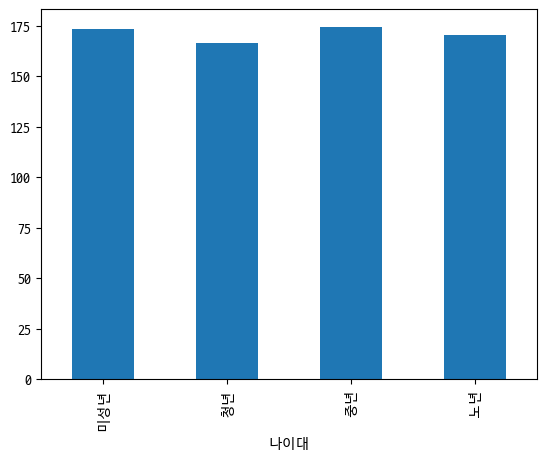

In [25]:
df_.groupby('나이대')['tall'].mean().plot(kind='bar')
# 한글 깨짐

In [236]:
# qcut : 구간을 일정하게 나누어서 각 구간별로 데이터의 개수를 동일하게 설정

pd.qcut(df['age'], 2)

0     (9.999, 67.0]
1     (9.999, 67.0]
2     (9.999, 67.0]
3      (67.0, 89.0]
4      (67.0, 89.0]
5     (9.999, 67.0]
6      (67.0, 89.0]
7     (9.999, 67.0]
8     (9.999, 67.0]
9      (67.0, 89.0]
10     (67.0, 89.0]
11     (67.0, 89.0]
12     (67.0, 89.0]
13    (9.999, 67.0]
14    (9.999, 67.0]
15    (9.999, 67.0]
16    (9.999, 67.0]
17     (67.0, 89.0]
18    (9.999, 67.0]
19     (67.0, 89.0]
20     (67.0, 89.0]
21    (9.999, 67.0]
22    (9.999, 67.0]
23     (67.0, 89.0]
24     (67.0, 89.0]
25    (9.999, 67.0]
26    (9.999, 67.0]
27     (67.0, 89.0]
28     (67.0, 89.0]
29     (67.0, 89.0]
Name: age, dtype: category
Categories (2, interval[float64, right]): [(9.999, 67.0] < (67.0, 89.0]]

In [26]:
# pandas의 df를 입력받아 tall 칼럼을 기준으로 10단계로 cut한뒤 그래프로 보여줘
import pandas as pd
import matplotlib.pyplot as plt

def plot_cut_by_tall(df, n = 10):
    # tall 칼럼을 기준으로 10단계로 cut
    df['tall_cut'] = pd.cut(df['tall'], bins=n, labels=range(-n//2+1, n//2+1))
    
    # tall_cut 칼럼의 값별로 count
    tall_count = df['tall_cut'].value_counts().sort_index()
    
    # 그래프 그리기
    plt.bar(tall_count.index.astype(str), tall_count.values)
    plt.xticks(rotation=45)
    plt.xlabel('Tall Range')
    plt.ylabel('Count')
    plt.title('Distribution of Tall')
    plt.show()

In [27]:
def plot_cut_by_age(df):
    bins_l = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    labels_l = ['0~', '10~', '20~', '30~', '40~', '50~', '60~', '70~', '80~', '90~']
    # tall 칼럼을 기준으로 10단계로 cut
    df['age_cut'] = pd.cut(df['age'], bins=bins_l, labels=labels_l)
    
    # tall_cut 칼럼의 값별로 count
    tall_count = df['age_cut'].value_counts().sort_index()
    
    # 그래프 그리기
    plt.bar(tall_count.index.astype(str), tall_count.values)
    plt.xticks(rotation=45)
    plt.xlabel('age Range')
    plt.ylabel('Count')
    plt.title('Distribution of Age')
    plt.show()

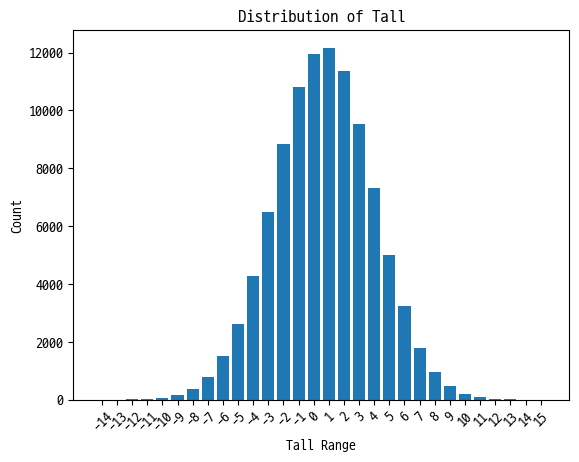

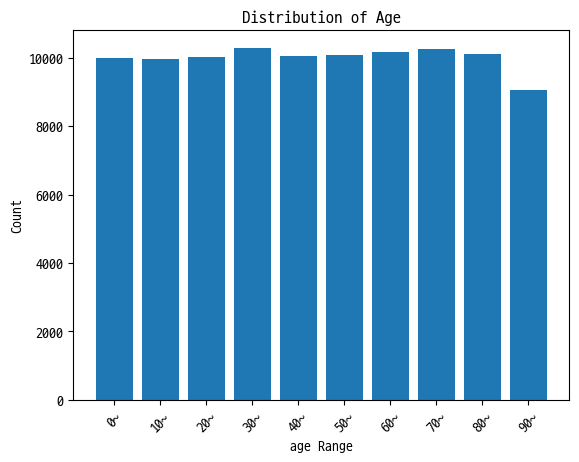

In [28]:
np.random.seed(100)
n = 100000
age =  np.random.randint(1, 100, n) # 1~99 사이의 정수 30개를 랜덤하게 생성
tall = np.round(np.random.normal(170, 10, n), 2) 
# 평균 170, 표준편차 10, 30개의 실수를 랜덤하게 생성
# 소수점 2자리까지 표시
d = { 'age' : age, 'tall': tall }
df_ = pd.DataFrame(d)
df_.head()

plot_cut_by_tall(df_, 30)
plot_cut_by_age(df_)

<b style='font-size:2em'>TODO </b>

In [1]:
import pandas as pd

In [2]:
# 1: data/diamonds.csv 를 읽어 DataFrame으로 만든다.
dia = pd.read_csv('data/diamonds.csv')
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# 2: price 컬럼을 '고가', '중가', '저가' 세개의 범주값을 가지는 "price_cate" 컬럼을 생성한다.
# 값은 3등분
dia['price_cate'] = pd.cut(dia['price'], 3, labels=['low', 'medium', 'high'])
dia.sort_values('price', ascending=False).head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_cate
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,high
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,high
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,high
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,high
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,high


In [4]:
pd.cut(dia['price'], 3, labels=['low', 'medium', 'high'])

0        low
1        low
2        low
3        low
4        low
        ... 
53935    low
53936    low
53937    low
53938    low
53939    low
Name: price, Length: 53940, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

<Axes: xlabel='price'>

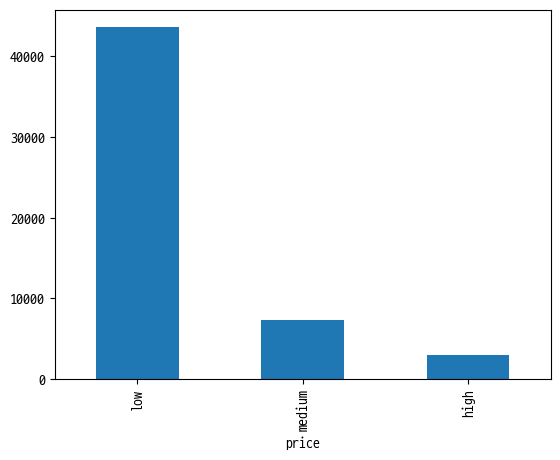

In [5]:
# price cut별 개수의 시각화
pd.cut(dia['price'], 3, labels=['low', 'medium', 'high']).value_counts().plot(kind='bar')

<Axes: xlabel='price'>

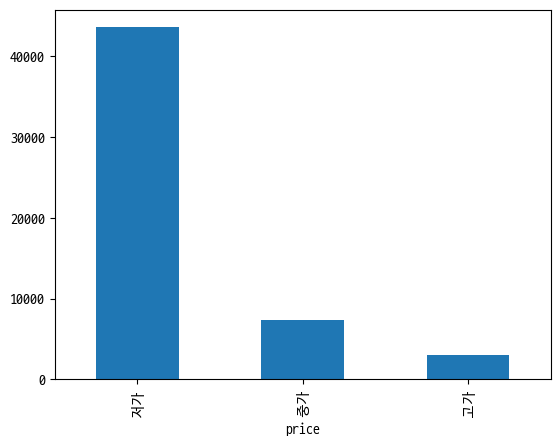

In [9]:
# price_cate별 개수의 시각화 한글 테스트
pd.cut(dia['price'], 3, labels=['저가', '중가', '고가']).value_counts().plot(kind='bar')

<Axes: xlabel='price_cate'>

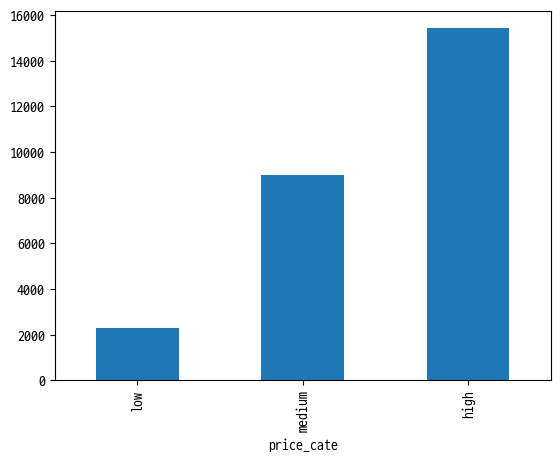

In [8]:
# price_cate별 평균 price의 시각화
dia_ = dia.copy()
dia_['price_cate'] = pd.cut(dia['price'], 3, labels=['low', 'medium', 'high'])
dia_.groupby('price_cate')['price'].mean().plot(kind='bar')

In [10]:
# 3 가격대(price_cate) 별 carat의 평균을 조회
dia.groupby('price_cate')['carat'].mean()

price_cate
low       0.627943
medium    1.362280
high      1.885256
Name: carat, dtype: float64

<Axes: xlabel='price_cate'>

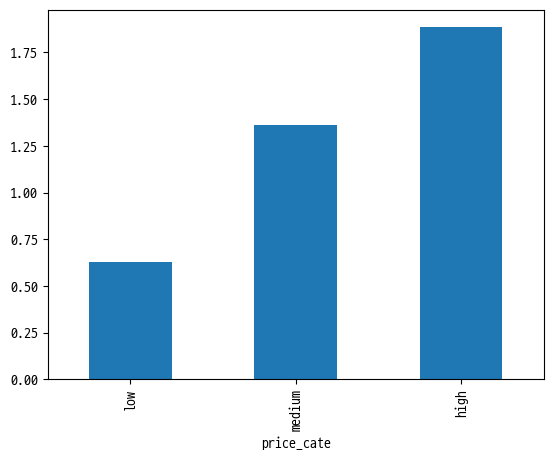

In [11]:
# 3 가격대(price_cate) 별 carat의 평균을 시각화
dia.groupby('price_cate')['carat'].mean().plot(kind='bar')

In [72]:
# 4 가격대(price_cate)와 cut별 평균 가격(price)를 피봇테이블로 조회
dia.pivot_table(index= 'price_cate', columns='cut', values='price', aggfunc='mean')

cut,Fair,Good,Ideal,Premium,Very Good
price_cate,,,,,
low,2976.492819,2589.423161,1991.838539,2513.585759,2383.723178
medium,8891.044335,8744.889273,9019.390308,9045.209888,8921.683740
high,15176.404762,15412.570213,15422.528676,15391.247016,15502.217323


In [73]:
# 5 cut, color, price_cate 별 carat의 평균을 피봇테이블로 조회
dia.pivot_table(index=['price_cate', 'color'],
                columns='cut',
                values='carat',
                aggfunc='mean'
                )


cut                   Fair      Good     Ideal   Premium  Very Good
price_cate color                                                   
low        D      0.807122  0.670725  0.502135  0.599525   0.599320
           E      0.767424  0.651305  0.511158  0.591792   0.577348
           F      0.791801  0.689913  0.529869  0.666792   0.619161
           G      0.849462  0.708228  0.528951  0.629871   0.614364
           H      0.977699  0.730387  0.617462  0.765683   0.712640
           I      0.988750  0.764122  0.669981  0.794620   0.760677
           J      1.067717  0.854693  0.792335  0.901903   0.832754
medium     D      1.339412  1.277551  1.170843  1.264649   1.226980
           E      1.443500  1.256889  1.198333  1.260486   1.212459
           F      1.564483  1.298312  1.189853  1.268342   1.193546
           G      1.807895  1.349915  1.193722  1.300076   1.244620
           H      1.796226  1.523187  1.398540  1.525855   1.489892
           I      1.784000  1.630000  1.533642  1.610519   1.551324
           J      1.985000  1.695397  1.645655  1.716263   1.707778
high       D      2.145714  1.626500  1.430909  1.636000   1.552857
           E      1.843333  1.717097  1.501395  1.715130   1.740141
           F      1.957273  1.809286  1.609551  1.705594   1.688632
           G      1.995000  1.864048  1.694875  1.793261   1.735664
           H      2.218750  2.093810  1.947143  2.069171   2.019664
           I      2.407778  2.104643  2.097365  2.127762   2.100703
           J      2.691818  2.242500  2.229880  2.236724   2.150377

In [13]:
# 5 cut, color, price_cate 별 carat의 평균을 피봇테이블로 조회
dia.pivot_table(index=['price_cate', 'cut'],
                columns='color',
                values='carat',
                aggfunc='mean'
                )


color                        D         E         F         G         H   
price_cate cut                                                           
low        Fair       0.807122  0.767424  0.791801  0.849462  0.977699  \
           Good       0.670725  0.651305  0.689913  0.708228  0.730387   
           Ideal      0.502135  0.511158  0.529869  0.528951  0.617462   
           Premium    0.599525  0.591792  0.666792  0.629871  0.765683   
           Very Good  0.599320  0.577348  0.619161  0.614364  0.712640   
medium     Fair       1.339412  1.443500  1.564483  1.807895  1.796226   
           Good       1.277551  1.256889  1.298312  1.349915  1.523187   
           Ideal      1.170843  1.198333  1.189853  1.193722  1.398540   
           Premium    1.264649  1.260486  1.268342  1.300076  1.525855   
           Very Good  1.226980  1.212459  1.193546  1.244620  1.489892   
high       Fair       2.145714  1.843333  1.957273  1.995000  2.218750   
           Good       1.626500  1.717097  1.809286  1.864048  2.093810   
           Ideal      1.430909  1.501395  1.609551  1.694875  1.947143   
           Premium    1.636000  1.715130  1.705594  1.793261  2.069171   
           Very Good  1.552857  1.740141  1.688632  1.735664  2.019664   

color                        I         J  
price_cate cut                            
low        Fair       0.988750  1.067717  
           Good       0.764122  0.854693  
           Ideal      0.669981  0.792335  
           Premium    0.794620  0.901903  
           Very Good  0.760677  0.832754  
medium     Fair       1.784000  1.985000  
           Good       1.630000  1.695397  
           Ideal      1.533642  1.645655  
           Premium    1.610519  1.716263  
           Very Good  1.551324  1.707778  
high       Fair       2.407778  2.691818  
           Good       2.104643  2.242500  
           Ideal      2.097365  2.229880  
           Premium    2.127762  2.236724  
           Very Good  2.100703  2.150377

In [14]:
# 5 cut, color, price_cate 별 carat의 평균을 피봇테이블로 조회
dia.pivot_table(index=['color', 'cut'],
                columns='price_cate',
                values='carat',
                aggfunc='mean'
                )


price_cate            low    medium      high
color cut                                    
D     Fair       0.807122  1.339412  2.145714
      Good       0.670725  1.277551  1.626500
      Ideal      0.502135  1.170843  1.430909
      Premium    0.599525  1.264649  1.636000
      Very Good  0.599320  1.226980  1.552857
E     Fair       0.767424  1.443500  1.843333
      Good       0.651305  1.256889  1.717097
      Ideal      0.511158  1.198333  1.501395
      Premium    0.591792  1.260486  1.715130
      Very Good  0.577348  1.212459  1.740141
F     Fair       0.791801  1.564483  1.957273
      Good       0.689913  1.298312  1.809286
      Ideal      0.529869  1.189853  1.609551
      Premium    0.666792  1.268342  1.705594
      Very Good  0.619161  1.193546  1.688632
G     Fair       0.849462  1.807895  1.995000
      Good       0.708228  1.349915  1.864048
      Ideal      0.528951  1.193722  1.694875
      Premium    0.629871  1.300076  1.793261
      Very Good  0.614364  1.244620  1.735664
H     Fair       0.977699  1.796226  2.218750
      Good       0.730387  1.523187  2.093810
      Ideal      0.617462  1.398540  1.947143
      Premium    0.765683  1.525855  2.069171
      Very Good  0.712640  1.489892  2.019664
I     Fair       0.988750  1.784000  2.407778
      Good       0.764122  1.630000  2.104643
      Ideal      0.669981  1.533642  2.097365
      Premium    0.794620  1.610519  2.127762
      Very Good  0.760677  1.551324  2.100703
J     Fair       1.067717  1.985000  2.691818
      Good       0.854693  1.695397  2.242500
      Ideal      0.792335  1.645655  2.229880
      Premium    0.901903  1.716263  2.236724
      Very Good  0.832754  1.707778  2.150377